---

# Mastère Spécialisé Expert en Science des données

---
## MACHINE LEARNING 2
---

*Auteur :* Paquarse Mahouvi

*Date:* 09-12-2023
---

# Partie 1 : Analyse discriminante linéaire et quadratique
## Prise en main

In [1]:
#Importation des packages et definition des fonctions importantes
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
plt.close('all')
# Fonctions
def plot_regions_decision_2d(X, y, classifier, resolution=0.02, titre=' '):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0, X[:, 0].max() + 0
    x2_min, x2_max = X[:, 1].min() - 0, X[:, 1].max() + 0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    marker=markers[idx], label= 'classe {}'.format(cl))
    plt.legend(loc='best')
    plt.title(titre, fontsize=12)

1. Présentation des données 

La base de données Iris comprend des mesures de quatre caractéristiques de fleurs d'iris de trois espèces différentes. Elle contient 150 fleurs d'iris differentes repartis à trois classes virginica, setosa et versicolor. Elle cotient 50 fleurs de chaque espèces sur lesquelles on a mesuré la longueur et la largeur du sépal ainsi que la longueur et la largeur du pétal.

In [4]:
iris = datasets.load_iris()
X, Y = iris.data, iris.target
print('Nombre de points : {}'.format(X.shape[0]))
print('Nombre de variables : {}'.format(X.shape[1]))
print('Nombre de classes : {}'.format(len(np.unique(Y))))
classes, nbpoints = np.unique(Y, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))

Nombre de points : 150
Nombre de variables : 4
Nombre de classes : 3
Classe 0 comprend 50 points
Classe 1 comprend 50 points
Classe 2 comprend 50 points


2. Mise en place de la LDA et de la QDA 

- LDA 

L'analyse discriminante linéaire est une technique statistique utilisée en apprentissage automatique et en statistique. Il s'agit d'un classificateur avec une frontière de décision linéaire, générée en ajustant les densités conditionnelles de classe aux données et en utilisant la règle de Bayes. Le modèle ajuste une densité gaussienne à chaque classe, en supposant que toutes les classes partagent la même matrice de covariance. Sa réalisation nécéssite de lui donner un certain nombre de paramètres (ici les paramètre `solver` & `store_covariance`)

Le paramètre solver dans le modèle LinearDiscriminantAnalysis (LDA) spécifie la méthode utilisée pour résoudre le problème d'optimisation associé à l'analyse discriminante linéaire. En d'autres termes, il détermine comment le modèle ajuste les paramètres pour séparer les classes dans l'espace des caractéristiques. Il peut prendre d'autres valeurs comme `svd (par défaut), lsqr, eigen`

`store_covariance` : booléen, par défaut=False. Si True, calcule explicitement la covariance intra-classe pondérée lorsque le solveur est 'svd'. La matrice est toujours calculée et stockée pour les autres solveurs.

La commande *clf_lda.fit(X, Y)* permet d'entraîner le modèle le modèle sur les données X et Y provenant de la base iris. 

*Y_lda = clf_lda.predict(X)* quant à elle permet de trouver les classes Y prédicte par le modèle.

la commande *err_lda = sum(Y_lda != Y)/Y.size* calcul le taux d'erreur du modèle de Linear Discriminant Analysis (LDA) en comparant les prédictions du modèle (Y_lda) avec les vraies étiquettes (Y). Voici une explication détaillée. Ce taux est calculé et renvoyé.


In [5]:
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda.fit(X, Y)
Y_lda = clf_lda.predict(X)
err_lda = sum(Y_lda != Y)/Y.size
print('LDA : taux d''erreur = {}%'.format(100*err_lda))

LDA : taux derreur = 2.0%


Commentaire : Le taux d'erreur de 2% signifie que le modèle de Linear Discriminant Analysis (LDA) fait des prédictions incorrectes pour environ 2% des échantillons dans l'ensemble de données sur lequel il a été évalué. Ainsi, seulement 2% des iris est mal classé par le modèle LDA

- QDA

La QDA, tout comme la LDA appartient à la famille des méthodes d'analyse discriminante. La principale différence entre la QDA et la LDA réside dans la manière dont elles modélisent la covariance des données. Tandis que la LDA suppose que toutes les classes partagent la même matrice de covariance, la QDA permet à chaque classe d'avoir sa propre matrice de covariance. La commande *clf_qda = QuadraticDiscriminantAnalysis(store_covariance=True)* crée une instance du modèle QDA avec l'option store_covariance activée, ce qui signifie que la matrice de covariance intra-classe sera calculée et stockée. 

In [10]:
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda.fit(X, Y)
print(clf_qda.means_)
Y_qda = clf_qda.predict(X)
err_qda = sum(Y_qda!= Y)/Y.size
print('QDA : taux d''erreur = {}%'.format(100*err_qda))

[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
QDA : taux derreur = 2.0%


Résumé :

| Modèle | Taux d'erreur |
|--------|---------------|
| LDA    |      2.0%     |
| QDA    |      2.0%     |

De l'analyse du tableau, il ressort que les deux modèles (LDA & QDA) donne le même taux d'erreur, soit 2%. On en conclut que ces deux modèles ont des performances simulaires

3. Centres et matrices de covariance de la LDA et QDA

Les fonctions munies de `.mean_ & .covariance` sont utilisées pour obtenir les paramètres estimés de la **LDA** et de la **GDA**

- Les moyennes de classes

In [11]:
print(clf_lda.means_)
print(clf_qda.means_)
clf_lda.means_ == clf_qda.means_

[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

De l'analyse des centres de classe obtenus par la LDA et la QDA, nous remarquons que les deux éléments sont les mêmes. Ceci semble tout à logique vu que la grande différence entre la LDA et la QDA résident dans la manière dont elle modélise la covariance des données. Cela explique témoigne aussi du fait que la LDA fait aussi que la QDA et qu'une séparation linéaire ou quadratique donne le même nombre de classe.

-   Les covariances 

La fonction `covariance_` associée à un résultat de LDA ou de QDA permettent d'accéder aux covariances intraclasse partagée entre les classes. La matrice de covariance intraclasse est une estimation de la variance et des covariances des variables pour chaque classe.Chaque élément (i, j) de la matrice représente la covariance entre les variables i et j dans le contexte d'une classe spécifique. La diagonale de la matrice contient les variances des variables pour chaque classe. Les covariances étant gérées différemment entre les deux méthodes, elle ne donne pas les mêmes résultats. 

In [12]:
print("Covariance la LDA")
print(clf_lda.covariance_)
print("Covariance la QDA")
print(clf_qda.covariance_)

Covariance la LDA
[[0.259708   0.09086667 0.164164   0.03763333]
 [0.09086667 0.11308    0.05413867 0.032056  ]
 [0.164164   0.05413867 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.041044  ]]
Covariance la QDA
[array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]]), array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
       [0.08518367, 0.09846939, 0.08265306, 0.04120408],
       [0.18289796, 0.08265306, 0.22081633, 0.07310204],
       [0.05577959, 0.04120408, 0.07310204, 0.03910612]]), array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
       [0.09376327, 0.10400408, 0.07137959, 0.04762857],
       [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
       [0.04909388, 0.04762857, 0.04882449, 0.07543265]])]


4. Représentation visuelle

- Pour les groupes 2 et 3

C:\Users\Paqua\AppData\Local\Temp\ipykernel_3916\4162315163.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\Paqua\AppData\Local\Temp\ipykernel_3916\4162315163.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


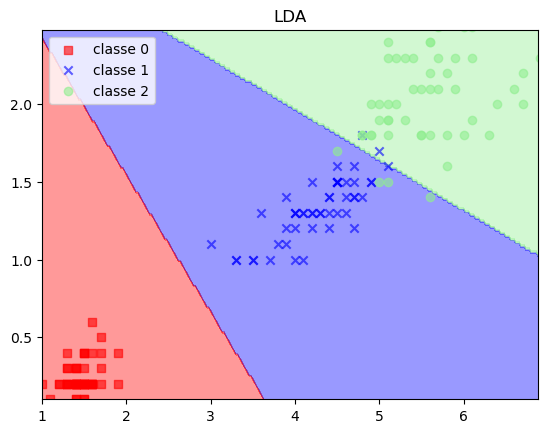

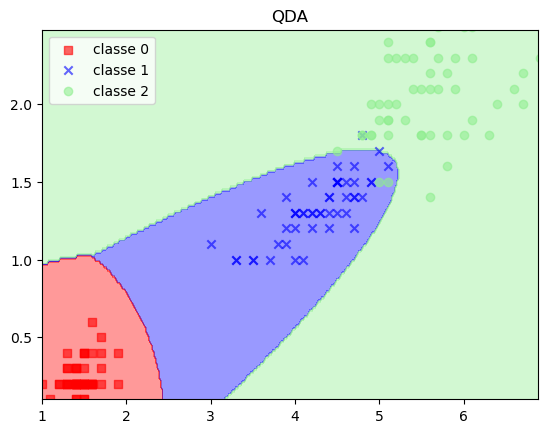

In [13]:
variables = [2, 3]
clf_lda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_lda, 0.02, titre='LDA')
clf_qda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_qda, 0.02, titre='QDA')

Nous pouvons visualer les séparations réalisés par la LDA et QDA pour les variables 2 et 3. En effet, il calcul la probabilité d'appartenance aux classes deux à deux. Cela revient à calculer des scores d'appartenance à chacune des classes.

- Pour les variables 0 et 1

C:\Users\Paqua\AppData\Local\Temp\ipykernel_3916\4162315163.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\Paqua\AppData\Local\Temp\ipykernel_3916\4162315163.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


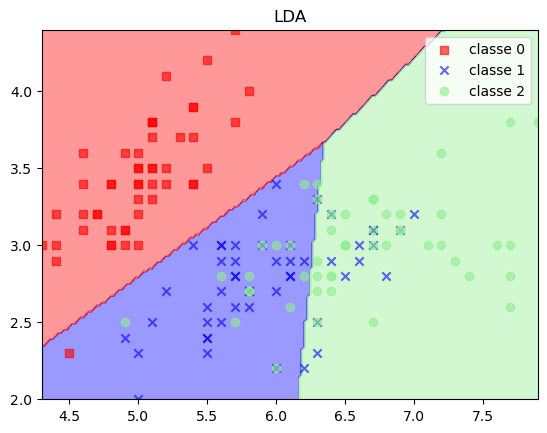

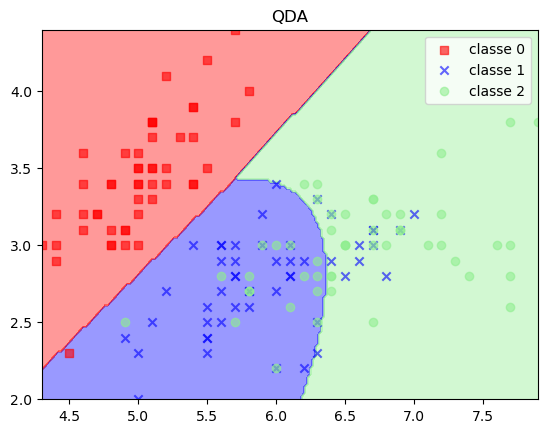

In [14]:
variables = [0, 1]
clf_lda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_lda, 0.02, titre='LDA')
clf_qda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_qda, 0.02, titre='QDA')

En représentant les variables 0 et 1, on observe notamment que la LDA et la QDA ont beaucoup de difficulté à séparer les groupes 1 et 2. Il sera donc intéressant de retourner voir ces éléments que confondent les modèles. 

## 1.2 Classification binaire

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

1. Chargement des données

In [16]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV",
"MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values
df.shape

(2126, 42)

1.1. Statistique descriptive

1.1.1. La variable d'intérêt 

In [17]:
uniqLabels, counts = np.unique(Y, return_counts=True)
for i, lab in enumerate(uniqLabels):
    print("Classe {} contient {} points".format(lab, counts[i]))

Classe 1 contient 1655 points
Classe 2 contient 295 points
Classe 3 contient 176 points


c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


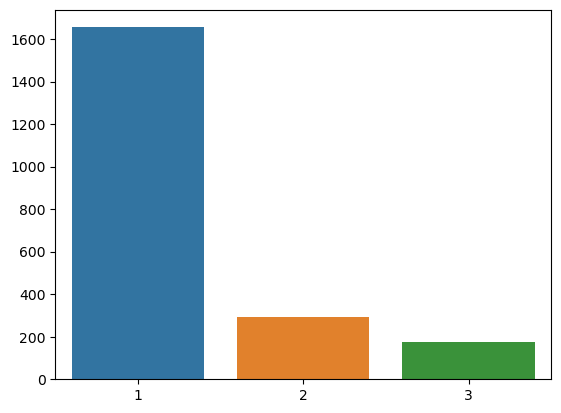

In [18]:
desc = pd.DataFrame({'Label': uniqLabels, 'Count': counts})
sns.barplot(x=uniqLabels, y = counts, data=desc)
desc.drop(desc.index, inplace=True)

La variable d'intérêt Y est composé de trois classes ; la classe 1 étant beaucoup plus représenté que les deux autres classes

1.1.2. Les autres variables

Le tableau suivant présente les statistiques descriptives des variables de notre base de données. Elle permet notamment de remarquer que les variables n'ont pas les mêmes ordre de grandeurs. Ceci est notamment mise en exergue par les differentes boites à moustache

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
b,2126.0,878.439793,894.084748,0.0,55.000,538.000,1521.000,3296.000
e,2126.0,1702.877234,930.919143,287.0,1009.000,1241.000,2434.750,3599.000
AC,2126.0,2.722484,3.560850,0.0,0.000,1.000,4.000,26.000
FM,2126.0,7.241298,37.125309,0.0,0.000,0.000,2.000,564.000
UC,2126.0,3.659925,2.847094,0.0,1.000,3.000,5.000,23.000
DL,2126.0,1.570085,2.499229,0.0,0.000,0.000,3.000,16.000
DS,2126.0,0.003293,0.057300,0.0,0.000,0.000,0.000,1.000
DP,2126.0,0.126058,0.464361,0.0,0.000,0.000,0.000,4.000
DR,2126.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.000
LB,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000


<Axes: >

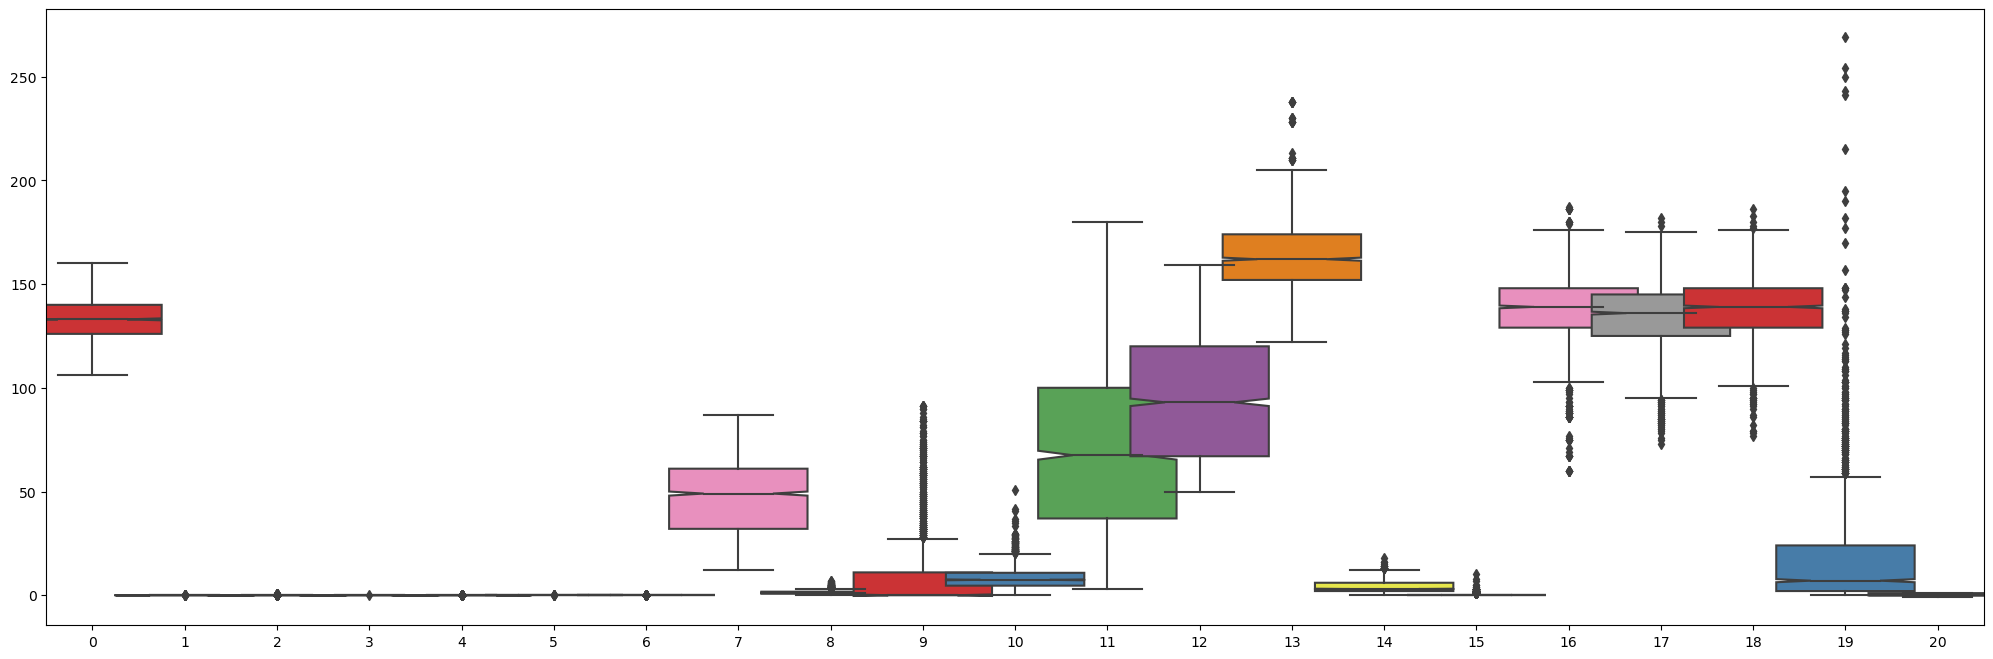

In [20]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(X, orient="v", palette="Set1",width=1.5,notch=True,ax=ax)

1.1.3. Matrice de corrélation

<Axes: >

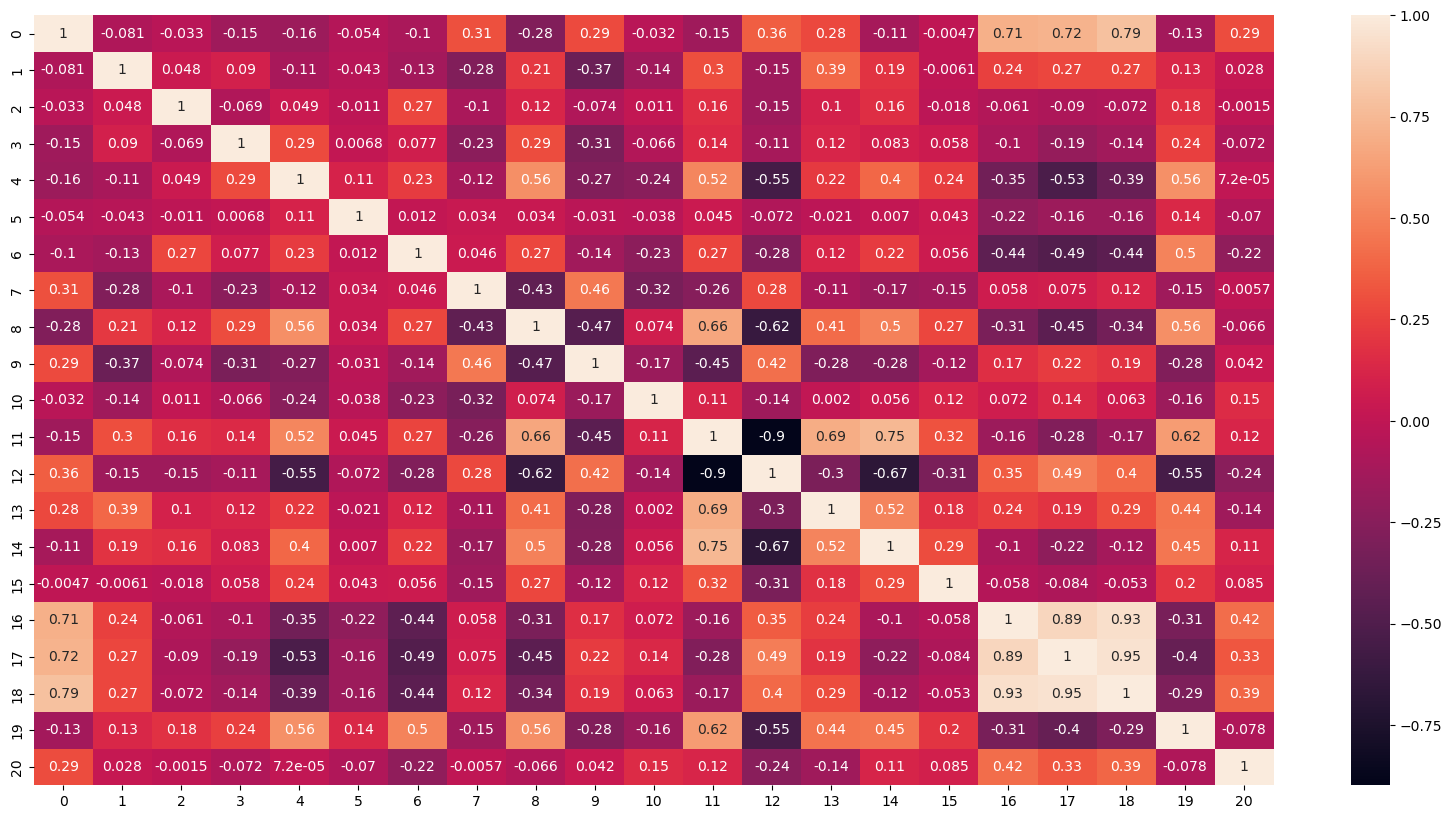

In [21]:
corr_mat = np.corrcoef(X.T)
plt.figure(figsize=(20, 10))
sns.heatmap(corr_mat, annot=True)

1.1.4. Traitement de la variable d'intérêt 

On va transformer le problème en un problème de classification binaire en fusionnant les classes 2 et 3 en une seule.

In [22]:
classe = 3
Y[np.in1d(Y, classe)] = 2

-    Construction des échantillons d'apprentissage et de test

In [23]:
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.5, stratify=Y, random_state=122)

La normalisation sera après la séparation des données pour ne pas influencé les données. Lorsque le train_test_split est effectué sans les options shuffle et stratity, les données ne sont pas mélangés avant de faire la séparation en échantillon et échantillon test. Dans un exemple de base de données de taille réduis ou non les données sont classés (0, 0 ,0 ... 0, 1, 1,...,1), si les données ne sont pas mélangé avant la construction des échantillons, on pourrait se retrouver avec un échantillon d'apprentissage constitué de 0 et l'échantillon test de 1. (ou vice-versa). D'où l'importance de mélangé les données avant la construction des échantillons

1.1.5. Centrer et réduire les données (le jeu d’apprentissage sert de référence)

In [24]:
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

L'enchainement proposé n'est pas bon. En effet nous ne disposons pas de l'informartion  sc = sc.fit(Xt) dans un context réel. Il est donc impossible de centré et réduire à partir des données que nous ne procédons pas. 

5. Réaliser une classification par la LDA, puis la QDA. Pour chaque méthode calculer et
afficher les erreurs de classification sur les données d’apprentissage et test. Comparer et
commenter les résultats obtenus.


In [25]:
clf_lda_bis = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda_bis.fit(Xa, Ya)
Y_lda_bis = clf_lda_bis.predict(Xt)
err_lda = sum(Y_lda_bis != Yt)/Yt.size
print('LDA : taux d''erreur = {}%'.format(100*err_lda))

LDA : taux derreur = 10.348071495766698%


In [26]:
clf_qda_bis = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda_bis.fit(Xa, Ya)
Y_qda_bis = clf_qda_bis.predict(Xt)
err_qda_bis = sum(Y_qda_bis!= Yt)/Yt.size
print('QDA : taux d''erreur = {}%'.format(100*err_qda_bis))

QDA : taux derreur = 18.156161806208843%


c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Nous abons le taux d'erreur pour la LDA (10.34%) qui est inférieur au taux d'erreur de la QDA. Nous pouvons donc en déduire que sur cet échantillon de données test que la LDA est plus performante que la QDA. Dans le but d'avoir une meilleur comparaison des autress, on a opté pour réaliser 400 échantillons différentes en changeant le random_state afin de comparer les deux modèles (s'échapper des fructuations d'échantillonage)

In [27]:
from sklearn.metrics import accuracy_score
echantillon = np.random.choice(np.arange(1000), size=400, replace=False)
erreur_lda = []
erreur_qda = []

In [28]:
for i in echantillon:
    Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.5, stratify=Y, random_state=i)
    sc = StandardScaler(with_mean=True, with_std=True)
    sc = sc.fit(Xa)
    Xa = sc.transform(Xa)
    Xt = sc.transform(Xt)

    clf_lda_mod = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
    clf_lda_mod.fit(Xa, Ya)
    Y_lda_mod = clf_lda_mod.predict(Xt)
    err_lda = (sum(Y_lda_mod!= Yt)/Yt.size)*100
    erreur_lda.append(err_lda)


    clf_qda_mod = QuadraticDiscriminantAnalysis(store_covariance = True)
    clf_qda_mod.fit(Xa, Ya)
    Y_qda_mod = clf_qda_mod.predict(Xt)
    err_qda = (sum(Y_qda_mod!= Yt)/Yt.size)*100
    erreur_qda.append(err_qda)

c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-

c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Paqua\anaconda3\Lib\site-

In [29]:
erreur_table = pd.DataFrame({'LDA_Error': erreur_lda*100, 'QDA_Error': erreur_qda*100})

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

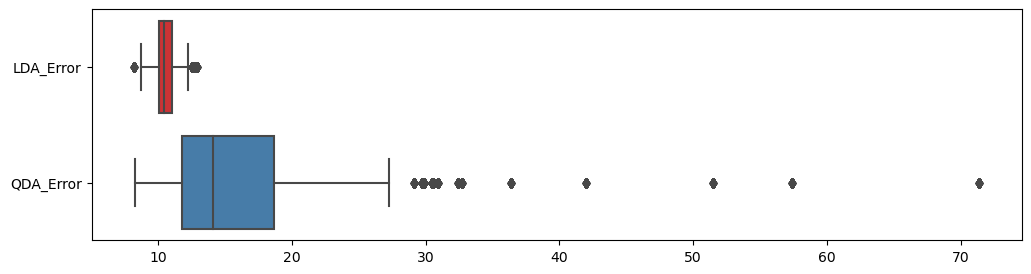

In [30]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(erreur_table, orient="h", width=0.8 ,palette="Set1",ax=ax)

En comparaison, on peut observer que le modèle LDA fait beaucoup mieux que la QDA. Par ailleurs, la QDA présente beaucoup de d'erreur très élévé contrairement à la LDA. Il serait sans doute intéressant de refaire le même processus sur la taille des échantillons. Il ne sera pas abordé dans notre cas. 

### 1.3 Cas multi-classe : données Mnist

1. Chargement des données

Nous allons illustrer le fait que la méthode LDA s’applique de façon directe sur des problèmes de classification multi-classe.Les données MNIST consistent en un ensemble de 70 000 images en noir et blanc de chiffres manuscrits de 0 à 9, chaque chiffre étant une image de 28x28 pixels. Ces images sont des exemples de chiffres écrits à la main par des étudiants et des employés du Bureau américain du recensement des États-Unis

In [31]:
# Instruction ci-dessous est a mettre en en-tete de votre programme
import scipy.io as sio
# Chargement des donnees
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

2. Statistique descriptive

In [32]:
pd.DataFrame(Xa).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


Nous sommes en présence de 717 variables representant les pixels et allant de 0 à 255. Nous ne sommes pas en mesures de regarder la variance des variables une à une. Nous avons donc opté pour une approche plus directe. Elle consiste à récuperer à partir des statistiques descriptives, les variances de chaque variable. On fera ensuite, un boxplot sur les variance afin d'apprécier les écarts et différences.

<Axes: >

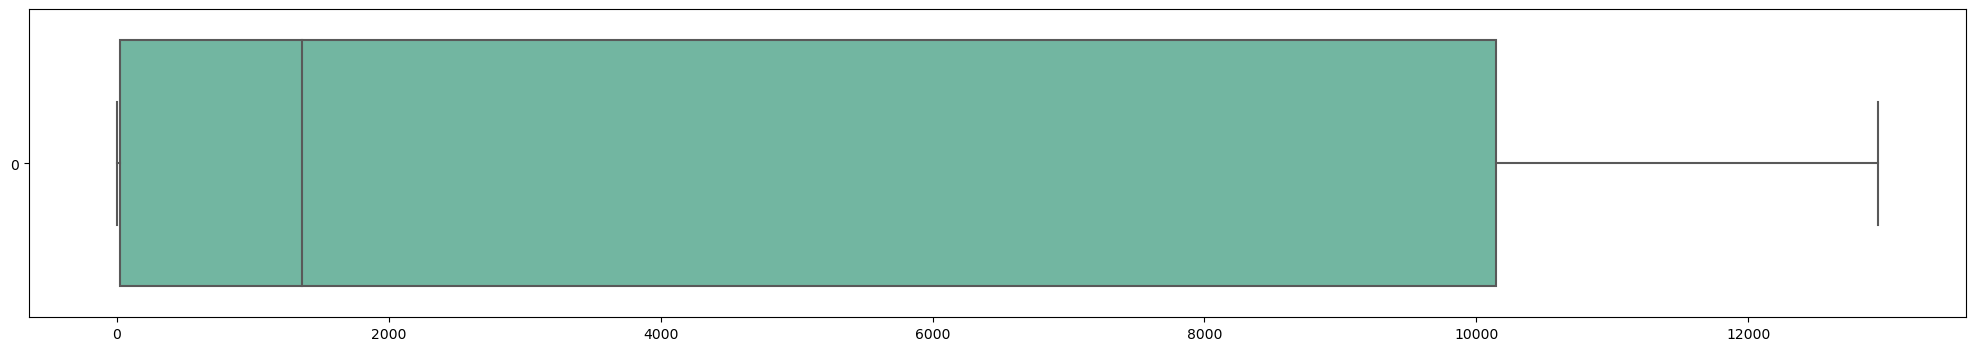

In [33]:
variance = (pd.DataFrame(Xa).describe().loc["std"])**2
fig, ax = plt.subplots(figsize=(25, 4))
sns.boxplot(variance, orient="h", palette="Set2")

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Paqua\AppData\Local\Temp\ipykernel_3916\2671696851.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=variance, palette="tab10", linewidth=2.5)
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paqua\an

<Axes: ylabel='std'>

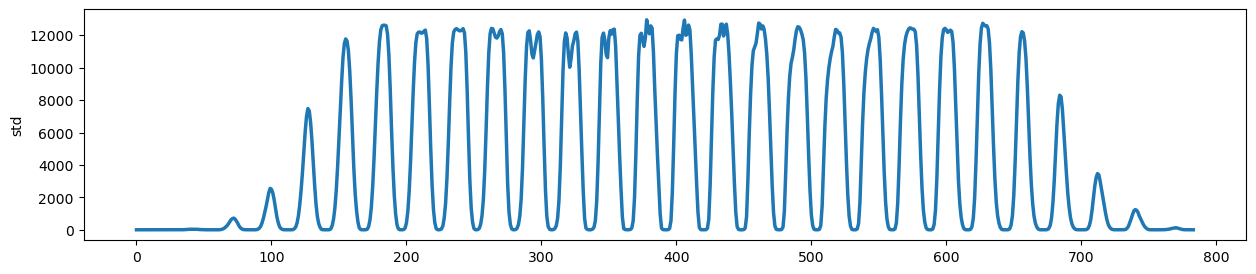

In [34]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.lineplot(data=variance, palette="tab10", linewidth=2.5)

De l'analyse de ces graphiques, il ressort que la variance des variables est très diiférente, allant de 0 à plus de 12000. On remarque donc que les variables ont des écarts très grand à leur moyenne.

In [35]:
tol = 1e-3
stda = np.std(Xa, 0)
idx_var = np.squeeze(np.where(stda > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

Le retrait des variables ayant un petit variance ne change pas la structure des données

4. Modèle

In [36]:
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

In [37]:
lda_mist = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
lda_mist.fit(Xa, Ya)
Y_lda_mist = lda_mist.predict(Xt)
error_lda_mist = sum(Y_lda_mist != Yt)/Yt.size
print('LDA : taux d''erreur = {}%'.format(100*error_lda_mist))

LDA : taux derreur = 12.7%


In [38]:
qda_mist = QuadraticDiscriminantAnalysis(store_covariance = True)
qda_mist.fit(Xa, Ya)
Y_qda_mist = qda_mist.predict(Xt)
error_qda_mist = sum(Y_qda_mist != Yt)/Yt.size
print('QDA : taux d''erreur = {}%'.format(100*error_qda_mist))

c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA : taux derreur = 47.44%


De l'analyse de ces taux d'erreur, pouvons retenir que le modèle LDA fait encore mieux que la QDA